<a href="https://colab.research.google.com/github/harshmudgil97/almabetter-EDA/blob/main/CH_Harsh_Mudgil_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(15,10)})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/EDA Self Project/Hotel Bookings.csv')

In [5]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Multivariate Analysis on Distribution Channels, Across Months

#Hypothesis 1: Average monthly ADR generated by ‘Direct’  distribution channel would be the highest across all months since distribution channels such as ‘Corporate’, ‘TA/TO’ and ‘GDS’ rely on discounted pricing.

In [7]:
df_a = df.groupby(['arrival_date_month','distribution_channel'])['adr'].mean().unstack()

In [8]:
df_a

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
arrival_date_month,,,,,
April,69.506132,99.523556,96.344444,102.033148,NaN
August,92.665061,161.898404,144.600000,137.520457,29.625
December,52.996086,93.565880,84.150909,80.414481,NaN
February,54.898209,71.510560,94.596316,75.612502,NaN
January,56.391486,63.135985,88.476190,73.682859,NaN
July,97.303323,146.999842,146.666000,124.672332,112.700
June,97.024611,126.272123,134.888889,116.734161,NaN
March,57.040800,76.761017,93.856250,83.280498,NaN
May,82.942954,109.854567,147.796000,110.024039,NaN


In [9]:
df_a = df_a.fillna(0)

#Test 1: Studying variation of average monthly ADR generated by each distribution channel across all months, plotted on a scatter plot with trend lines.

[Text(0, 0.5, 'Average ADR/Month')]

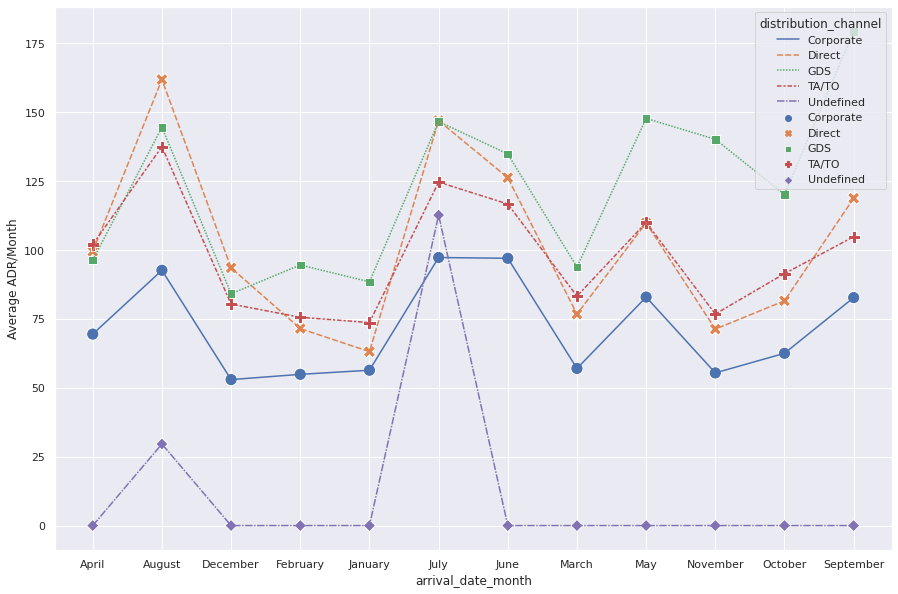

In [10]:
g = sns.scatterplot(data = df_a,s=150)
f = sns.lineplot(data = df_a)
f.set(ylabel='Average ADR/Month')

#Analysis: 
1. AM-ADR generated from ‘Direct’ channel doesn’t remain the highest across all months. 

2. For the months of February and January, it is taken over by AM-ADR generated by ‘GDS’ and ‘TA/TO’. 

3. For the months of June, March, May, November, October  and September AM-ADR from ‘GDS’ remains higher than ‘Direct’ channel. 

4. AM-ADR for ‘Direct’ channel remain almost equal to the AM-ADR generated by ‘TA/TO’. But for the month of September, AM-ADR from ‘Direct’ channels exceeds AM-ADR generated from ‘TA/TO’ channel.


#Conclusion:
The hypothesis is only partially true. ‘Direct’, ‘GDS’ and ‘TA/TO’ channels deliver highest AM-ADR across all the months.

#Hypothesis 2: ‘Corporate’ distribution channel should consistently deliver most number of repeated guests per month, since business related affairs are recurring in nature.

In [11]:
df_b = df.groupby(['arrival_date_month','distribution_channel'])['is_repeated_guest'].sum().unstack()

In [12]:
df_b = df_b.fillna(0)

In [13]:
df_b

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
arrival_date_month,,,,,
April,144.0,65.0,1.0,73.0,0.0
August,51.0,61.0,0.0,111.0,0.0
December,127.0,89.0,0.0,98.0,0.0
February,133.0,119.0,0.0,159.0,0.0
January,164.0,105.0,0.0,128.0,0.0
July,94.0,61.0,0.0,146.0,0.0
June,138.0,75.0,0.0,69.0,0.0
March,175.0,129.0,1.0,121.0,0.0
May,180.0,72.0,0.0,114.0,0.0


#Test 2: Studying variations in number of repeated guests delivered by each distribution channel across all months, plotted on a scatter plot with trend lines.

[Text(0, 0.5, 'Number of Repeated Guests')]

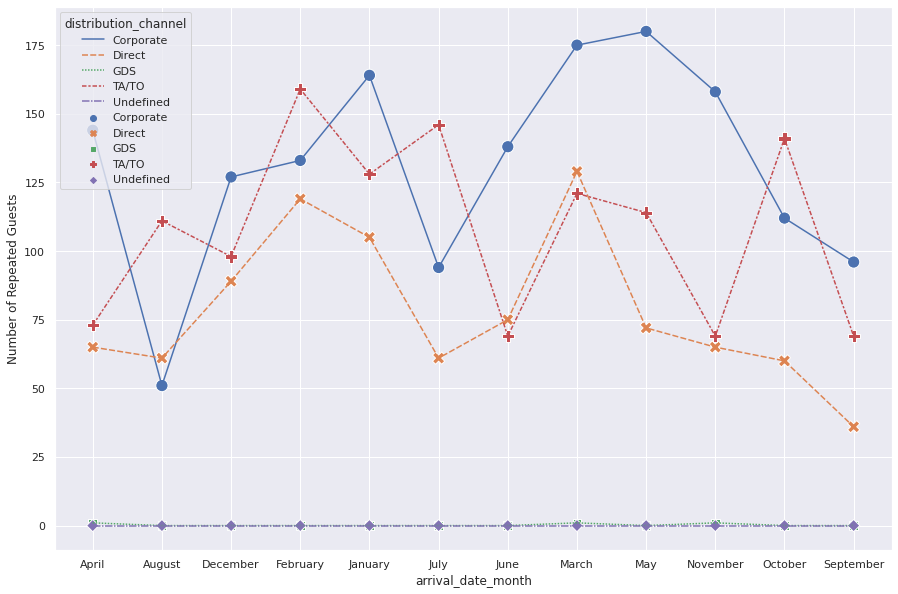

In [14]:
g = sns.scatterplot(data = df_b,s=150)
f = sns.lineplot(data = df_b)
f.set(ylabel='Number of Repeated Guests')


#Analysis: 
1. Number of repeated guests, remains highest for ‘Corporate’ distribution channel for most of the months.

2. For the months of August, February, July and October the number of repeated guests delivered by ‘TA/TO’ channel is highest and exceeds the number of repeated guests delivered by ‘Corporate’ channel


#conclusion:
The hypothesis is partially true. ‘Corporate’ distribution channel sends the most number of repeated guests for all months except four (August, February, July and October) 

#Hypothesis 3: Cancellation percentage for guests delivered through ‘TA/TO’ channel should be the high across all months, since agents and operators sell holiday packages and holiday plans are subject to change as per people’s conveniences.



In [15]:
df_c = df.groupby(['arrival_date_month','distribution_channel']).agg({'is_canceled':['count','sum']})

In [16]:
df_c['cancel_percent'] = (df_c['is_canceled'].loc[:,'sum']/df_c['is_canceled'].loc[:,'count'])*100

In [17]:
df_c.drop('is_canceled',axis=1,inplace=True)

In [18]:
df_c = df_c.unstack().fillna(0)

In [19]:
df_c[['Corporate', 'Direct','GDS','TA/TO','Undefined']] = df_c.cancel_percent.loc[:,:'undefined']

In [20]:
df_c.drop('cancel_percent',axis = 1,inplace=True)

#Test 3: Studying variations in cancellation percentages for each distribution channel across all months, plotted on a scatter plot with trend lines.

[Text(0, 0.5, 'Cancellation Percentatges')]

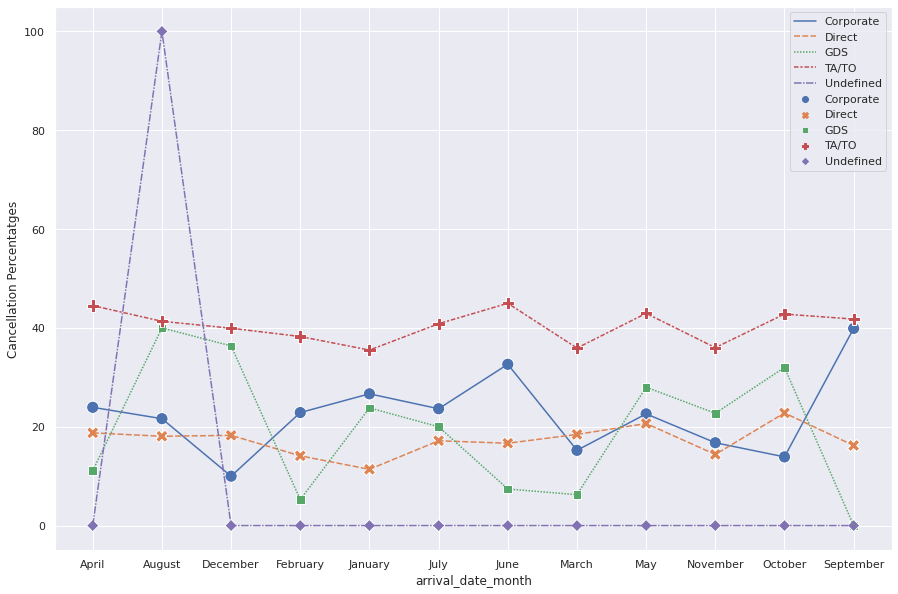

In [21]:
g = sns.scatterplot(data = df_c,s=150)
f = sns.lineplot(data = df_c)
f.set(ylabel='Cancellation Percentatges')

#Analysis: 
1. Cancellation percentage for guests delivered by ‘TA/TO’ channel remains constantly the highest across all months.

2. For the month of August, ‘Undefined’ channel has the highest cancellation percentage, higher than ‘TA/TO’ channel.

3. For the month of August, cancellation percentage for ‘GDS’ channel is almost equal to the cancellation percentage for ‘TA/TO’ channel.

4. For the month of September, cancellation percentage for ‘Corporate’ channel is almost equal to the cancellation percentage for ‘TA/TO’ channel.


#Conclusion: 
The hypothesis remains largely true, except for the month of August, which is an anomaly in a largely true trend.

#Hypothesis 4: Guests delivered by ‘TA/TO’ channel should make the highest special requests, consistently across all months, since agents and operators sell holiday packages and holiday plans are subject to change as per people’s conveniences.

In [22]:
df_d = df.groupby(['arrival_date_month','distribution_channel'])['total_of_special_requests'].sum().unstack()

In [23]:
df_d

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
arrival_date_month,,,,,
April,92.0,618.0,2.0,5071.0,NaN
August,102.0,1550.0,2.0,8564.0,5.0
December,111.0,598.0,0.0,3454.0,NaN
February,103.0,632.0,2.0,3504.0,NaN
January,117.0,371.0,6.0,2752.0,NaN
July,98.0,1098.0,0.0,7307.0,2.0
June,123.0,683.0,2.0,5361.0,NaN
March,147.0,491.0,0.0,4234.0,NaN
May,153.0,518.0,8.0,5601.0,NaN


#Test 4: Studying variations in number of special requests for each distribution across months, plotted on a scatter plot with trend lines.

[Text(0, 0.5, 'Number of special requests')]

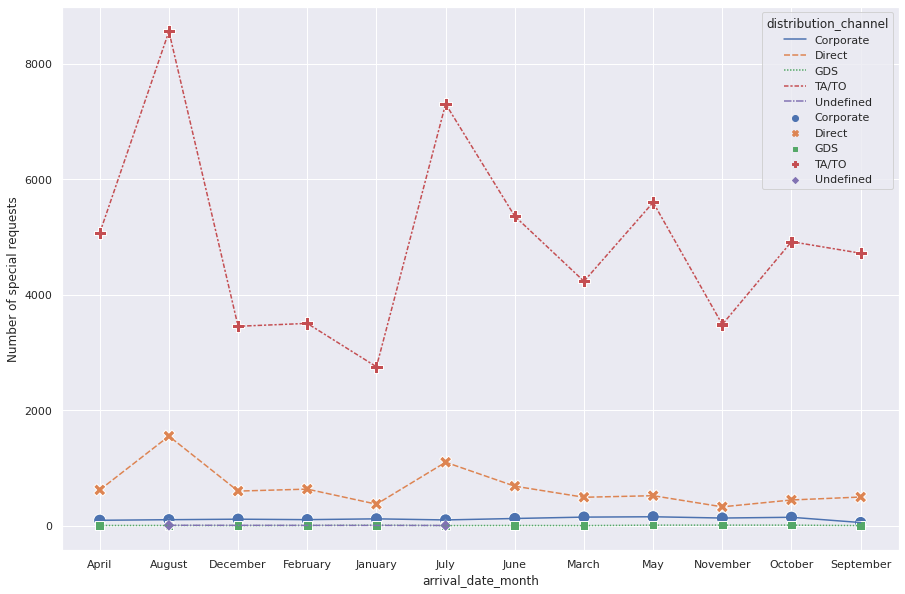

In [24]:
g = sns.scatterplot(data = df_d,s=150)
f = sns.lineplot(data = df_d)
f.set(ylabel='Number of special requests')

#Analysis: 
1. Guests, delivered through agents and operators, consistently make the highest special requests across all months.

2. Guests, delivered through ‘Direct’ channel, consistently make the second-highest number of special requests across all months.


#Conclusion: 
The hypothesis is, thus, true in its entirety.

#Actionable Insights: Suggestions based upon insights to build a sound marketing strategy.

1. ‘Direct’, ‘GDS’ and ‘TA/TO’ channels deliver highest AM-ADR across all the months. More monthly marketing budget could be allocated to these channels to maximize AM-ADR.

2. ‘Corporate’ channel delivers most repeated guests. New Letters, updates and other promotional material should be sent to corporate clients, monthly to keep in touch with them and to further increase the number of repeated guests.

3. Cancellation percentages are consistently high for ‘TA/TO’ channel across all months. A deposit should be taken from guests delivered by ‘TA/TO’ distribution channel to cut down losses and operational inefficiencies.

4. ‘TA/TO’ channel delivers guests who make the most special requests across all months, followed by guests delivered by  ‘Direct’ channel. Special requests add to the revenue of the hotel and so, customers from ‘TA/TO’ and ‘Direct’ channel should be offered to avail special requests by the staff as frequently as possible to increase the special requests that are made.
